In this notebook I'm comparing my implementation with that shared by the author, Kendrick Kay, available at his website: [http://kendrickkay.net/socmodel/](http://kendrickkay.net/socmodel/).

In particular, I'll be referring to this page: [http://kendrickkay.net/socmodel/html/cssmodel_example.html](http://kendrickkay.net/socmodel/html/cssmodel_example.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from cssmodel.model import *

These are the parameters of an example voxel that was fitted using real data:

In [2]:
kay_examples_params = [
    62.0031314121038,  # row
    70.3915456636858,  # col
    2.73865321049464,  # sigma
    6.41562465044818,  # gain
    0.428524030231163  # n
]
kep = kay_examples_params  # shortcut

Visualize the parameter estimates

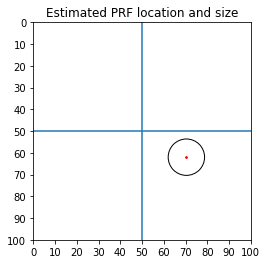

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_prfs([kep[1] - 50], [kep[0] - 50], [kep[2]], n=kep[4], ax=ax);
ax.set_title('Estimated PRF location and size')
ax.set_xticks(np.arange(0, 101, 10));
ax.set_yticks(np.arange(0, 101, 10));

Visualize the response profile by summing activations to a point stimulus across the visual field

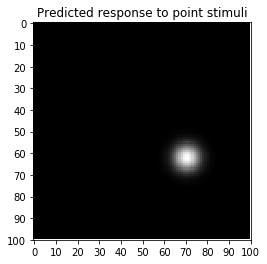

In [4]:
resp = np.zeros((100, 100))
for r in range(100):
    for c in range(100):
        stim = np.zeros((100, 100))
        stim[r, c] = 1.
        resp[r, c] = activation(stim, kep[1], kep[0], kep[2], gain=kep[3], n=kep[4])
        
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.imshow(resp, cmap='gray');
ax.set_title('Predicted response to point stimuli')
ax.set_xticks(np.arange(0, 101, 10));
ax.set_yticks(np.arange(0, 101, 10));

We can also use this example to investigate how changing $n$ changes the response profile

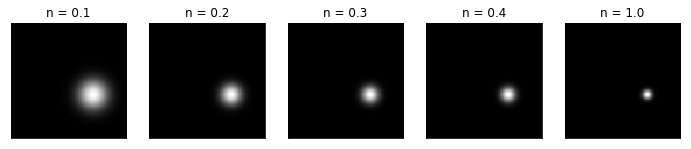

In [6]:
ns = [0.1, 0.2, 0.3, 0.4, 1.]

fig, axs = plt.subplots(1, len(ns), figsize=(12, 4))

for n, ax in zip(ns, axs):
    resp = np.zeros((100, 100))
    for r in range(100):
        for c in range(100):
            stim = np.zeros((100, 100))
            stim[r, c] = 1.
            resp[r, c] = activation(stim, kep[1], kep[0], kep[2], gain=kep[3], n=n)
    ax.imshow(resp, cmap='gray');
    ax.set_title('n = {0:.1f}'.format(n))
    ax.set_xticks([]);
    ax.set_yticks([]);